In [1]:
from analysis import analysis
from analysis import read_predictions_csv
from analysis import topk_accuracy
import matplotlib.pyplot as plt
import glob
%matplotlib inline

/home/dev/.local/lib/python3.5/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
Using TensorFlow backend.


In [23]:
model_list = [
    '/home/dgj/Desktop/models/lstm_train_20171019_102202/',
    '/home/dgj/Desktop/models/lstm_train_20171021_115928/',
    '/home/dgj/Desktop/models/lstm_train_20171021_115955/',
    '/home/dgj/Desktop/models/lstm_train_20171021_120042/',
    '/home/dgj/Desktop/models/ucf-5-final_train_20171021_164229/',
    '/home/dgj/Desktop/models/ucf-10-final_train_20171021_164334/',
    '/home/dgj/Desktop/models/ucf-20-final_train_20171021_164537/',
    '/home/dgj/Desktop/models/ucf-40-final_train_20171021_164606/',
]

feature_list = [
    '/home/dgj/sd-gcp/sequences/ucf-5-final/hold',
    '/home/dgj/sd-gcp/sequences/ucf-10-final/hold',
    '/home/dgj/sd-gcp/sequences/ucf-20-final/hold',
    '/home/dgj/sd-gcp/sequences/ucf-40-final/hold',
    '/home/dgj/sd-gcp/sequences/ucf-5-final/hold',
    '/home/dgj/sd-gcp/sequences/ucf-10-final/hold',
    '/home/dgj/sd-gcp/sequences/ucf-20-final/hold',
    '/home/dgj/sd-gcp/sequences/ucf-40-final/hold',
]

output_list = [m + 'predictions.csv' for m in model_list]

In [19]:
# for i in range(len(model_list)):
#     model_filename = glob.glob(model_list[i] + '*.hdf5')[0]
#     feature_dir = feature_list[i]
#     output_filename = output_list[i]
#     analysis(model_filename, feature_dir, output_filename)

100%|██████████| 101/101 [02:47<00:00,  1.61s/it]


In [25]:
top1 = []
top5 = []

for csvfile in output_list:
    y_list,class_names = read_predictions_csv(csvfile)
    top1.append(topk_accuracy(y_list,1)[0])
    top5.append(topk_accuracy(y_list,5)[0])

In [27]:
gru1 = top1[0:4]
gru5 = top5[0:4]
lstm1 = top1[4:]
lstm5 = top5[4:]

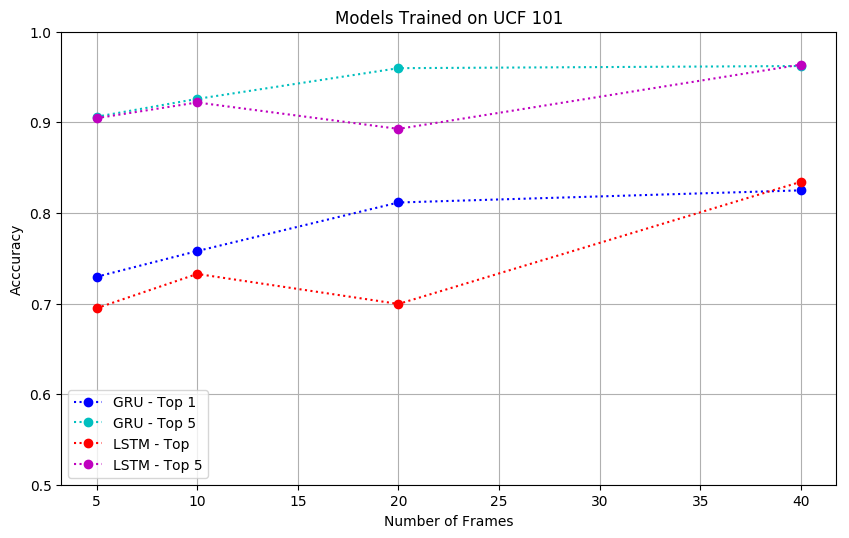

In [76]:
x = [5,10,20,40]
plt.figure(dpi=100,figsize=(10,6))
plt.plot(x,gru1,':o',c='b')
plt.plot(x,gru5,':o',c='c')
plt.plot(x,lstm1,':o',c='r')
plt.plot(x,lstm5,':o',c='m')
plt.xlabel('Number of Frames')
plt.ylabel('Acccuracy')
plt.legend(['GRU - Top 1','GRU - Top 5','LSTM - Top ','LSTM - Top 5'])
plt.grid('on')
plt.ylim([0.5,1])
plt.title('Models Trained on UCF 101')

In [72]:
print('GRU Top 1:', gru1)
print('GRU Top 5:', gru5)
print('LSTM Top 1',lstm1)
print('LSTM Top 5',lstm5)

GRU Top 1: [0.72949526813880117, 0.75788643533123023, 0.81151419558359628, 0.82492113564668768]
GRU Top 5: [0.90615141955835965, 0.92586750788643535, 0.95977917981072558, 0.96214511041009465]
LSTM Top 1 [0.69479495268138791, 0.73264984227129326, 0.69952681388012616, 0.83438485804416396]
LSTM Top 5 [0.9045741324921136, 0.92192429022082023, 0.89274447949526814, 0.9637223974763407]


In [4]:
model_list = [
    '/home/dev/sd-gcp/kinetics-5_train_20171022_113938/', # gru, 0.66 split
    '/home/dev/sd-gcp/kinetics-5_train_20171022_145804/', # lstm 0.66 split
    '/home/dev/sd-gcp/kinetics-5_train_20171022_200128/', # gru 0.8 split
]

feature_list = [
    '/home/dev/sd-gcp/sequences/kinetics-5/hold',
    '/home/dev/sd-gcp/sequences/kinetics-5/hold',
    '/home/dev/sd-gcp/sequences/kinetics-5/hold',
]

output_list = [m + 'predictions.csv' for m in model_list]

In [3]:
# for i in range(len(model_list)):
#     model_filename = glob.glob(model_list[i] + '*.hdf5')[0]
#     feature_dir = feature_list[i]
#     output_filename = output_list[i]
#     analysis(model_filename, feature_dir, output_filename)

100%|██████████| 94/94 [00:08<00:00, 11.14it/s]


In [9]:
top1 = []
top5 = []

for csvfile in output_list:
    y_list,class_names = read_predictions_csv(csvfile)
    top1.append(topk_accuracy(y_list,1)[0])
    top5.append(topk_accuracy(y_list,5)[0])

In [8]:
print(top1)
print(top5)

[0.41177744100454639, 0.33816843472613123, 0.40679800822688877]
[0.68391426715739334, 0.60965576964710999, 0.68521324962113028]
